In [8]:
%matplotlib inline

模範コード

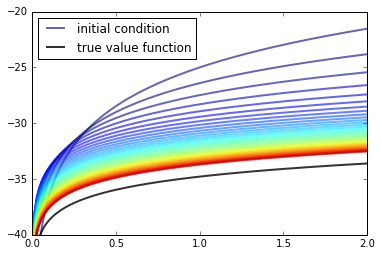

In [13]:
"""
Filename: optgrowth_v0.py
Authors: John Stachurski and Tom Sargent

A first pass at solving the optimal growth problem via value function
iteration.  A more general version is provided in optgrowth.py.

"""
from __future__ import division  # Not needed for Python 3.x
import matplotlib.pyplot as plt
import numpy as np
from numpy import log
from scipy.optimize import fminbound
from scipy import interp

# Primitives and grid
alpha = 0.65
beta = 0.95
grid_max = 2
grid_size = 150
grid = np.linspace(1e-6, grid_max, grid_size)
# Exact solution
ab = alpha * beta
c1 = (log(1 - ab) + log(ab) * ab / (1 - ab)) / (1 - beta)
c2 = alpha / (1 - ab)


def v_star(k):
    return c1 + c2 * log(k)


def bellman_operator(w):
    """
    The approximate Bellman operator, which computes and returns the updated
    value function Tw on the grid points.

        * w is a flat NumPy array with len(w) = len(grid)

    The vector w represents the value of the input function on the grid
    points.
    """
    # === Apply linear interpolation to w === #
    Aw = lambda x: interp(x, grid, w)
    

    # === set Tw[i] equal to max_c { log(c) + beta w(f(k_i) - c)} === #
    Tw = np.empty(grid_size)
    for i, k in enumerate(grid):
        objective = lambda c: - log(c) - beta * Aw(k**alpha - c)
        c_star = fminbound(objective, 1e-6, k**alpha)
        Tw[i] = - objective(c_star)

    return Tw

# === If file is run directly, not imported, produce figure === #
if __name__ == '__main__':

    w = 5 * log(grid) - 25  # An initial condition -- fairly arbitrary
    n = 35
    fig, ax = plt.subplots()
    ax.set_ylim(-40, -20)
    ax.set_xlim(np.min(grid), np.max(grid))
    lb = 'initial condition'
    ax.plot(grid, w, color=plt.cm.jet(0), lw=2, alpha=0.6, label=lb)
    for i in range(n):
        w = bellman_operator(w)
        ax.plot(grid, w, color=plt.cm.jet(i / n), lw=2, alpha=0.6)
    lb = 'true value function'
    ax.plot(grid, v_star(grid), 'k-', lw=2, alpha=0.8, label=lb)
    ax.legend(loc='upper left')

    plt.show()

この例題では以下のような設定である。  
$ f(k) = k^\alpha, \alpha=0.65 $  
$ u(c) = ln c $  
$ \beta = 0.95 $

In [5]:
def fk(k):
    fk = pow(k, 0.65)
    return fk

def uc(c):
    uc = log(c)
    return uc

我々は以下を最大化しなくてはならない。  
$ \sum_{t = 0}^{\infty} \beta^t u(c_t) $

これを最大化するcを求めれば良いが、ここでcはkの関数であり、政策関数を用いて、  
$ c_t = \sigma(k_t)
\quad \text{for all } t $  
と書ける。

なおα、βが与えられた時の解析的な解は次で与えられる。

In [21]:
def analysis(alpha, beta, k):
    c_1 = log(1-alpha*beta)/(1-beta) + log(alpha*beta)*alpha*beta/((1-alpha*beta)(1-beta))
    c_2 = alpha/(1-alpha*beta)
    v = c_1 + c_2*log(k)
    return v

wを繰り返し更新することで真の方程式に近づける。  
$ Tw(k) := \max_{0 \leq c \leq f(k)}
    \left\{
        u(c) + \beta w(f(k) - c)
    \right\} $

In [ ]:
def improve(n, k):
    for i in range(0,n):
        

停止条件を満たすまでiterationをする。

しかし、ここで問題が生じる。繰り返し更新するためには前の関数を保存しなければならない。だが、関数を保存するためには変数kに対するTwの値を全て保存する必要があるのだが、それは不可能。そこで「いくつかの点」のみに絞って記録をする。

In [ ]:
def wgreedy():
    f_k = f(k)
    for i in range(0,n):
    
    for j in range(0,):

In [58]:
def irr(a, b, c):
    line = []
    g = 0
    for r in range(1,999):
        r = r/1000
        line.append(a+b/(1+r) + c/pow((1+r), 2))
        if (a+b/(1-r) + c/pow((1+ r),2))*(a+b/(1+ (r-0.001)) + c/pow((1+( r-0.001)), 2)) < 0:
            g = r
    return line, g

In [59]:
(-375)-300/(1.2) + 900/pow((1.2), 2)

0.0

0.2


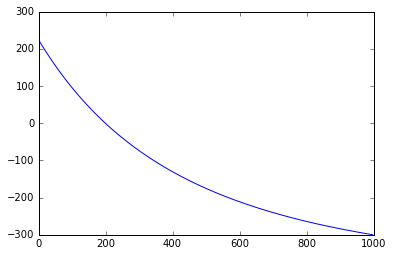

In [60]:
line, g = irr(-375, -300, 900)
plt.plot(line)
print(g)

0.2


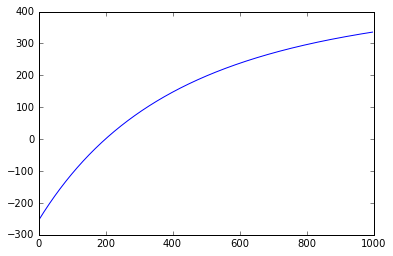

In [61]:
line, g = irr(400, 400, -1056)
plt.plot(line)
print(g)

0.998


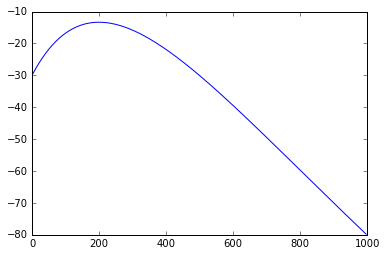

In [50]:
line, g = irr(-430, 1000, -600)
plt.plot(line)
print(g)

for i in 

In [14]:
grid = np.linspace(1e-6, grid_max, grid_size)
grid

array([  1.00000000e-06,   1.34238121e-02,   2.68466242e-02,
         4.02694362e-02,   5.36922483e-02,   6.71150604e-02,
         8.05378725e-02,   9.39606846e-02,   1.07383497e-01,
         1.20806309e-01,   1.34229121e-01,   1.47651933e-01,
         1.61074745e-01,   1.74497557e-01,   1.87920369e-01,
         2.01343181e-01,   2.14765993e-01,   2.28188805e-01,
         2.41611617e-01,   2.55034430e-01,   2.68457242e-01,
         2.81880054e-01,   2.95302866e-01,   3.08725678e-01,
         3.22148490e-01,   3.35571302e-01,   3.48994114e-01,
         3.62416926e-01,   3.75839738e-01,   3.89262550e-01,
         4.02685362e-01,   4.16108174e-01,   4.29530987e-01,
         4.42953799e-01,   4.56376611e-01,   4.69799423e-01,
         4.83222235e-01,   4.96645047e-01,   5.10067859e-01,
         5.23490671e-01,   5.36913483e-01,   5.50336295e-01,
         5.63759107e-01,   5.77181919e-01,   5.90604732e-01,
         6.04027544e-01,   6.17450356e-01,   6.30873168e-01,
         6.44295980e-01,

In [15]:
from numpy import log
from scipy.optimize import fminbound
from scipy import interp

# Primitives and grid
alpha = 0.65
beta = 0.95
grid_max = 2
grid_size = 150
grid = np.linspace(1e-6, grid_max, grid_size)
# Exact solution
ab = alpha * beta
c1 = (log(1 - ab) + log(ab) * ab / (1 - ab)) / (1 - beta)
c2 = alpha / (1 - ab)


def v_star(k):
    return c1 + c2 * log(k)


def bellman_operator(w):
    """
    The approximate Bellman operator, which computes and returns the updated
    value function Tw on the grid points.

        * w is a flat NumPy array with len(w) = len(grid)

    The vector w represents the value of the input function on the grid
    points.
    """
    # === Apply linear interpolation to w === #
    Aw = lambda x: interp(x, grid, w)

    # === set Tw[i] equal to max_c { log(c) + beta w(f(k_i) - c)} === #
    Tw = np.empty(grid_size)
    for i, k in enumerate(grid):
        objective = lambda c: - log(c) - beta * Aw(k**alpha - c)
        c_star = fminbound(objective, 1e-6, k**alpha)
        Tw[i] = - objective(c_star)
    return Tw

In [18]:
def compute_greedy(w):
    Aw = lambda x: interp(x, grid, w) 

    sigma = np.empty(grid_size)
    for i, k in enumerate(grid):
        objective = lambda c: - log(c) - beta * Aw(k**alpha - c)
        sigma[i] = fminbound(objective, 1e-6, k**alpha)
    return sigma

In [19]:
compute_greedy(100)

0 334
1e-06 334
1 334
0.0134238120805 334
2 334
0.0268466241611 334
3 334
0.0402694362416 334
4 334
0.0536922483221 334
5 334
0.0671150604027 334
6 334
0.0805378724832 334
7 334
0.0939606845638 334
8 334
0.107383496644 334
9 334
0.120806308725 334
10 334
0.134229120805 334
11 334
0.147651932886 334
12 334
0.161074744966 334
13 334
0.174497557047 334
14 334
0.187920369128 334
15 334
0.201343181208 334
16 334
0.214765993289 334
17 334
0.228188805369 334
18 334
0.24161161745 334
19 334
0.25503442953 334
20 334
0.268457241611 334
21 334
0.281880053691 334
22 334
0.295302865772 334
23 334
0.308725677852 334
24 334
0.322148489933 334
25 334
0.335571302013 334
26 334
0.348994114094 334
27 334
0.362416926174 334
28 334
0.375839738255 334
29 334
0.389262550336 334
30 334
0.402685362416 334
31 334
0.416108174497 334
32 334
0.429530986577 334
33 334
0.442953798658 334
34 334
0.456376610738 334
35 334
0.469799422819 334
36 334
0.483222234899 334
37 334
0.49664504698 334
38 334
0.51006785906 334
39

array([  0.00000000e+000,   0.00000000e+000,   2.27298708e-314,
         2.15143019e-314,   0.00000000e+000,   0.00000000e+000,
                     nan,   0.00000000e+000,   6.01346930e-154,
         0.00000000e+000,   4.44659081e-323,   2.27164953e-314,
         2.13556946e-314,   5.51675431e-048,   1.91655603e-076,
         4.07346626e+223,   2.23522219e-314,   3.53791059e-057,
         3.55727265e-322,   3.45845952e-323,   2.27164953e-314,
         2.13556955e-314,   0.00000000e+000,   4.94065646e-324,
         4.94065646e-324,   2.23522219e-314,   6.03104652e-154,
         7.11454530e-322,   1.48219694e-323,   2.27164953e-314,
         2.13556956e-314,   0.00000000e+000,   4.94065646e-324,
         4.94065646e-324,   3.61546010e-043,   0.00000000e+000,
         1.06718180e-321,   4.44659081e-323,   2.27164953e-314,
         2.13556958e-314,   0.00000000e+000,   1.97626258e-323,
         4.94065646e-324,   3.76050342e+179,   2.36942755e-038,
         1.42290906e-321,   4.44659081e-